### **loading the libraries**

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import datetime as dt


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### **Data cleaning**

In [2]:
df = pd.read_csv('Customer_support_data.csv')
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01-08-2023 11:13,01-08-2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01-08-2023 12:52,01-08-2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01-08-2023 20:16,01-08-2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01-08-2023 20:56,01-08-2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01-08-2023 10:30,01-08-2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


Text(0.5, 1.0, 'messing value pourcentage')

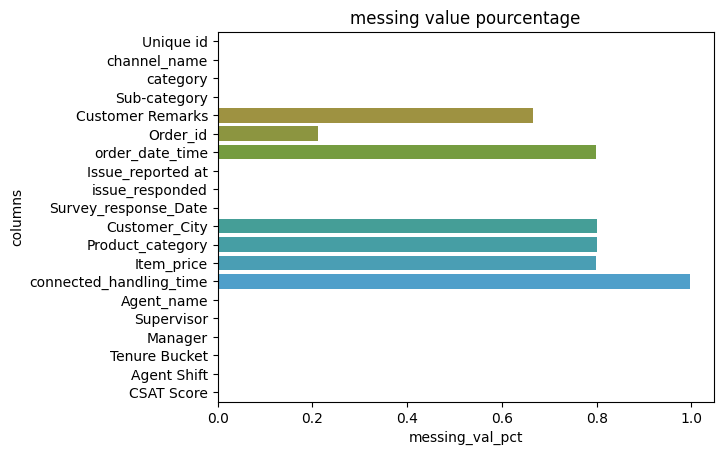

In [3]:
nan_value = [ val / df.shape[0] for val in df.isna().sum()]
messing_values = pd.DataFrame(nan_value,df.columns).reset_index()
messing_values.columns = ['columns','messing_val_pct']
messing_values
sns.barplot(messing_values,y='columns',x='messing_val_pct',hue='columns')
plt.title('messing value pourcentage')

* this plot represents the pourcentage of messing values in our dataset , we can observe that for 6 columns the messing value pourcentage is superior than 0.5 so the best strategy to clean the data is to drop this columns 

In [4]:
col_drop = messing_values.loc[messing_values['messing_val_pct'] > 0,'columns'].tolist()
col_drop

['Customer Remarks',
 'Order_id',
 'order_date_time',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time']

In [5]:
df.drop(col_drop,axis=1,inplace=True)

In [6]:
df.head()

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,01-08-2023 11:13,01-08-2023 11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,01-08-2023 12:52,01-08-2023 12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,01-08-2023 20:16,01-08-2023 20:38,01-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,01-08-2023 20:56,01-08-2023 21:16,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,01-08-2023 10:30,01-08-2023 10:32,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [7]:
df.drop(df.columns[0],axis=1,inplace=True)

In [8]:
df.head()

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,Outcall,Product Queries,Life Insurance,01-08-2023 11:13,01-08-2023 11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,01-08-2023 12:52,01-08-2023 12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,Inbound,Order Related,Installation/demo,01-08-2023 20:16,01-08-2023 20:38,01-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,Inbound,Returns,Reverse Pickup Enquiry,01-08-2023 20:56,01-08-2023 21:16,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,Inbound,Cancellation,Not Needed,01-08-2023 10:30,01-08-2023 10:32,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [9]:
df.dtypes

channel_name            object
category                object
Sub-category            object
Issue_reported at       object
issue_responded         object
Survey_response_Date    object
Agent_name              object
Supervisor              object
Manager                 object
Tenure Bucket           object
Agent Shift             object
CSAT Score               int64
dtype: object

In [10]:
for col in df.columns[3:5]:
    df[col] = pd.to_datetime(df[col],format='%d-%m-%Y %H:%M')

In [11]:
df

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,Outcall,Product Queries,Life Insurance,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,Inbound,Order Related,Installation/demo,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,Inbound,Returns,Reverse Pickup Enquiry,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,Inbound,Cancellation,Not Needed,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...
85902,Inbound,Refund Related,Refund Enquiry,2023-08-30 23:20:00,2023-08-31 07:22:00,31-Aug-23,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,Inbound,Order Related,Seller Cancelled Order,2023-08-31 08:15:00,2023-08-31 08:17:00,31-Aug-23,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,Inbound,Order Related,Order status enquiry,2023-08-31 18:57:00,2023-08-31 19:02:00,31-Aug-23,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,Inbound,Feedback,UnProfessional Behaviour,2023-08-31 19:59:00,2023-08-31 20:00:00,31-Aug-23,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


In [12]:
df['resolution_time'] = (df[df.columns[4]] - df[df.columns[3]]).dt.total_seconds() / 60
df.head()

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,resolution_time
0,Outcall,Product Queries,Life Insurance,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34.0
1,Outcall,Product Queries,Product Specific Information,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2.0
2,Inbound,Order Related,Installation/demo,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22.0
3,Inbound,Returns,Reverse Pickup Enquiry,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20.0
4,Inbound,Cancellation,Not Needed,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2.0


### **Exploring our data**

##### **exploring the categorical columns**

In [13]:
categ_col = [ col for col in df.columns if len(df[col].unique()) < 20]
for col in categ_col :
    print('--'*45)
    print(f'column : {col}')
    print(f' number of unique values  :{len(df[col].unique())}')
    print(f'unique values :{df[col].unique()}')
    
    

------------------------------------------------------------------------------------------
column : channel_name
 number of unique values  :3
unique values :['Outcall' 'Inbound' 'Email']
------------------------------------------------------------------------------------------
column : category
 number of unique values  :12
unique values :['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website']
------------------------------------------------------------------------------------------
column : Manager
 number of unique values  :6
unique values :['Jennifer Nguyen' 'Michael Lee' 'William Kim' 'John Smith' 'Olivia Tan'
 'Emily Chen']
------------------------------------------------------------------------------------------
column : Tenure Bucket
 number of unique values  :5
unique values :['On Job Training' '>90' '0-30' '31-60' '61-90']
------------------

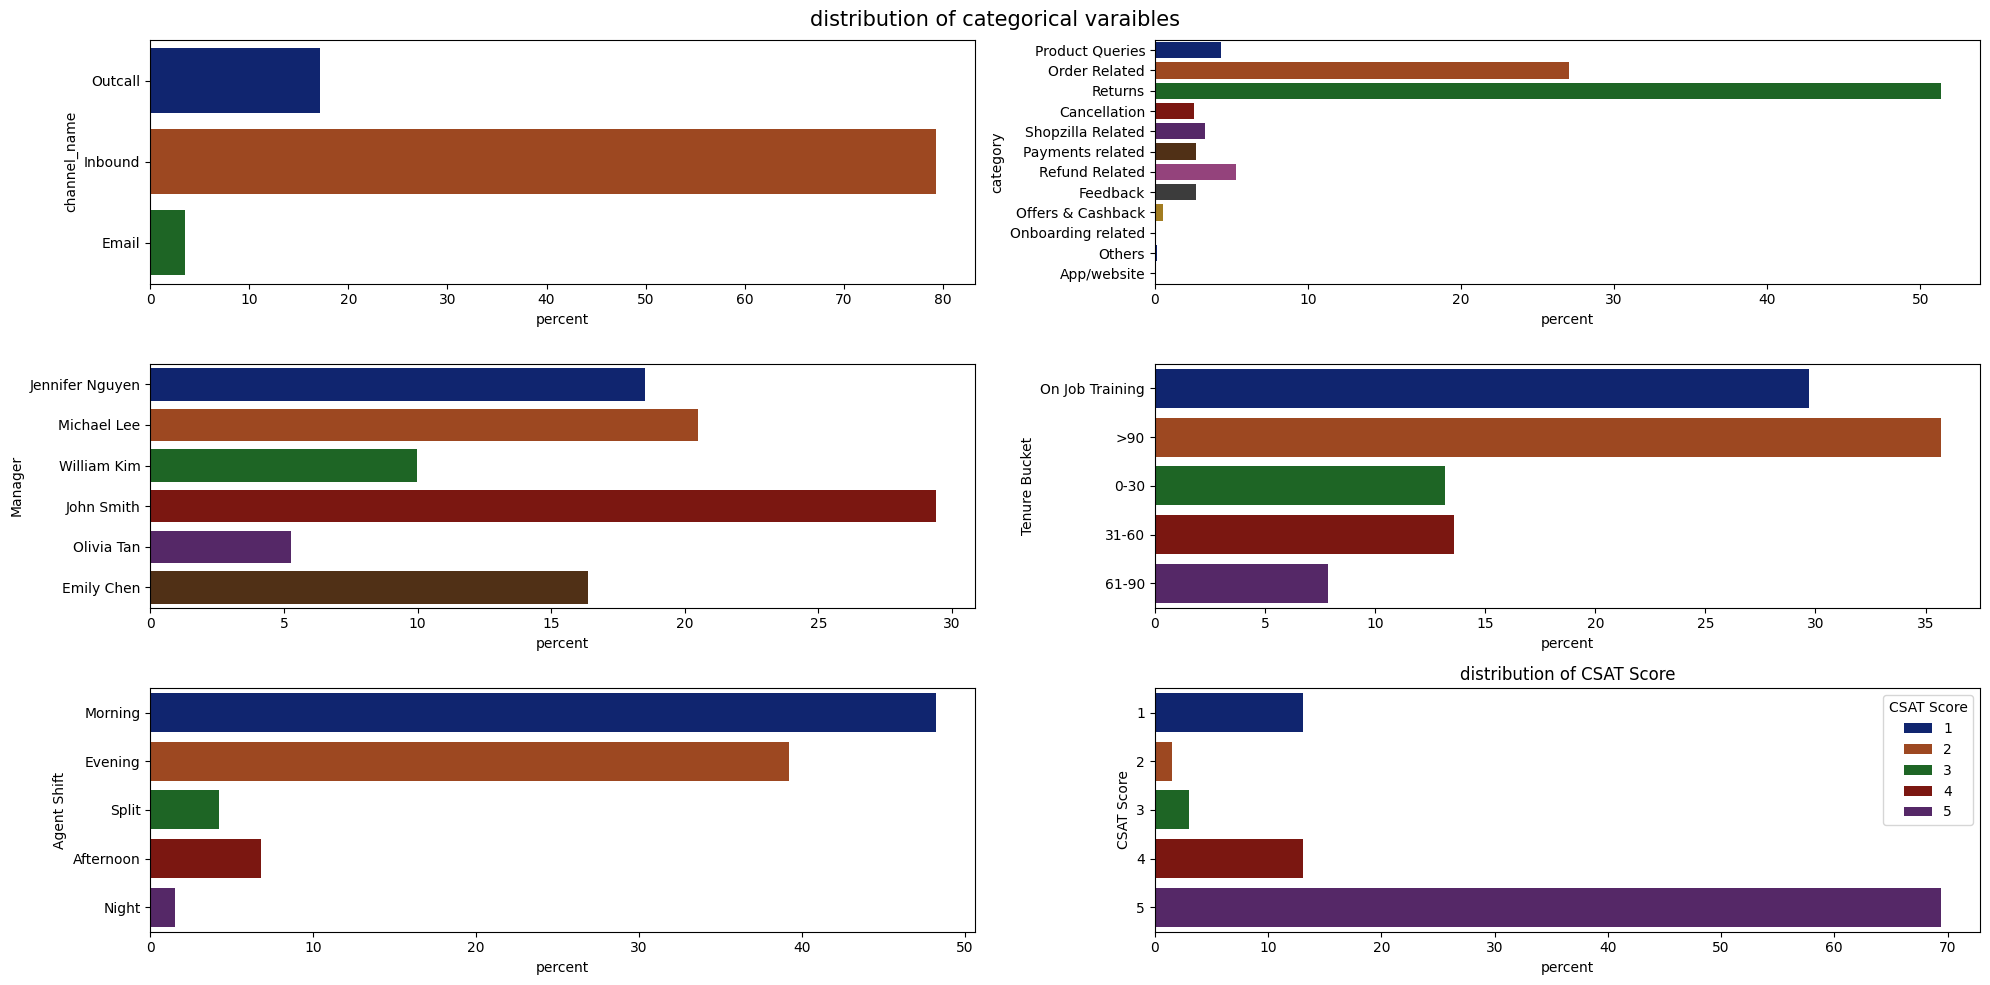

In [45]:
fig , ax = plt.subplots(3,2,figsize=(20,10))
plt.suptitle('distribution of categorical varaibles',size=15)
ax = ax.flatten()

for i,col in enumerate (categ_col) :
    sns.countplot( df,y=col,hue=col,palette='dark',ax=ax[i],stat='percent')
    plt.title(f'distribution of {col}')
plt.tight_layout()    
